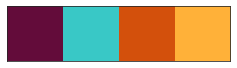

In [7]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [8]:
# Import my spotify data
songs = pd.read_csv("mySongsDataset.csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          48 non-null     object 
 1   artist        48 non-null     object 
 2   id            48 non-null     object 
 3   danceability  48 non-null     float64
 4   energy        48 non-null     float64
 5   loudness      48 non-null     float64
 6   speechiness   48 non-null     float64
 7   acousticness  48 non-null     float64
 8   tempo         48 non-null     float64
 9   liveness      48 non-null     float64
 10  valence       48 non-null     float64
dtypes: float64(8), object(3)
memory usage: 4.2+ KB


In [9]:

songs = songs.drop(['energy','valence','tempo'],axis=1)
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,Dynamite,BTS,0t1kP63rueHleOhQkYSXFY,0.746,-4.410,0.0993,0.0112,0.0936
1,Savage Love (Laxed - Siren Beat),Jawsh 685,1xQ6trAsedVPCdbtDAmk0c,0.767,-8.520,0.0803,0.2340,0.2690
2,Savage Love (Laxed – Siren Beat) [BTS Remix],Jawsh 685,4TgxFMOn5yoESW6zCidCXL,0.758,-5.695,0.0868,0.1600,0.2950
3,Ice Cream (with Selena Gomez),BLACKPINK,60jpDubMmVyR5molJp2TCm,0.791,-3.852,0.3500,0.0305,0.0423
4,Se Te Nota (with Guaynaa),Lele Pons,11EnQRgRMJwMAesfkB5pnu,0.905,-3.152,0.0664,0.0907,0.2660


In [11]:
# to describe numerical features we can use describe()
songs.describe()

,danceability,loudness,speechiness,acousticness,liveness
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.689771,-6.536229,0.080271,0.327392,0.175754
std,0.135015,2.845061,0.074854,0.272109,0.103341
min,0.297000,-13.662000,0.027400,0.004540,0.039800
25%,0.612750,-8.365250,0.035300,0.093325,0.091900
50%,0.725500,-6.481000,0.059300,0.261500,0.142000
75%,0.768500,-4.323000,0.090500,0.524000,0.242750
max,0.957000,-1.266000,0.361000,0.965000,0.386000


# Main Analysis

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>, <AxesSubplot:>]],
      dtype=object)

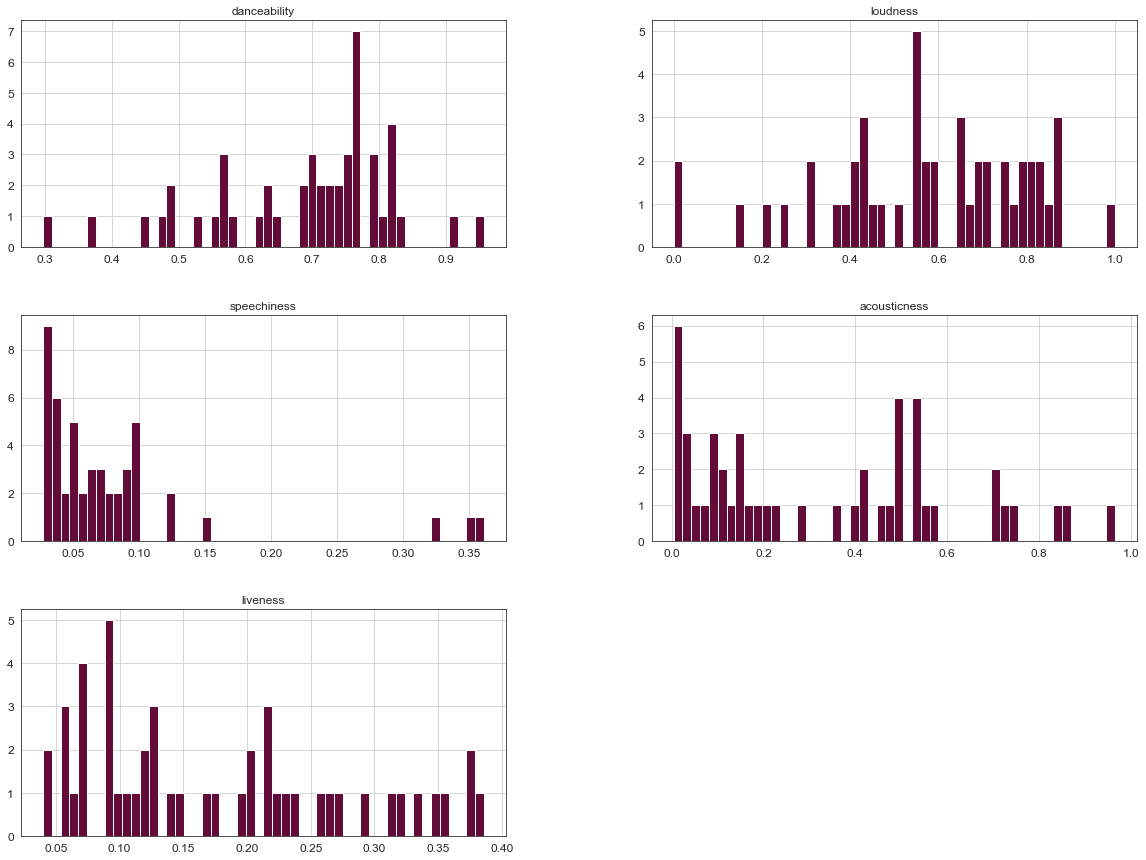

In [12]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)




songs.hist(bins=50,figsize=(20,15))

Most features are skewed to the left or the right


In [6]:
# from pandas.plotting import scatter_matrix
# # attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']

# scatter_matrix(songs[attr],figsize=(12,8))

In [13]:
# remove song names, artist and id before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)



In [14]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [15]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4614008300855567)
For n_clusters = 3, silhouette score is 0.35921344058251575)
For n_clusters = 4, silhouette score is 0.24954728363483583)
For n_clusters = 5, silhouette score is 0.3060568282335651)
For n_clusters = 6, silhouette score is 0.2609557418103301)
For n_clusters = 7, silhouette score is 0.24485234931344277)
For n_clusters = 8, silhouette score is 0.2744743398484178)
For n_clusters = 9, silhouette score is 0.27651467476261565)
For n_clusters = 10, silhouette score is 0.26123073693171855)
For n_clusters = 11, silhouette score is 0.27696717840247687)
For n_clusters = 12, silhouette score is 0.25945855549368096)
For n_clusters = 13, silhouette score is 0.25201204719078407)
For n_clusters = 14, silhouette score is 0.24310899773106578)


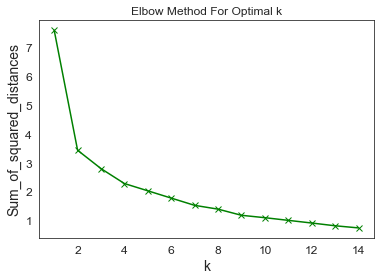

In [16]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)


KMeans(n_clusters=4)

In [18]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


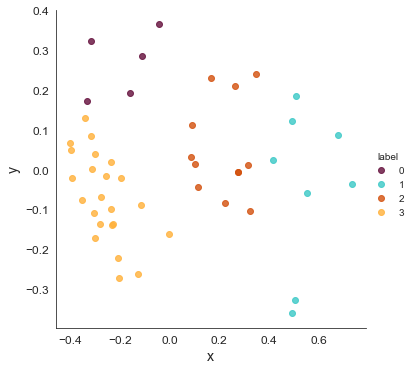

In [19]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [20]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

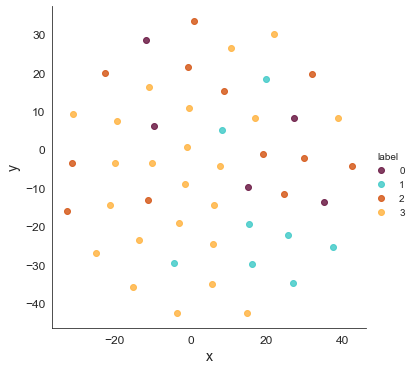

In [21]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [22]:
pca.explained_variance_ratio_

array([0.67723506, 0.16489135])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. By looking at the explained_variance_ratio_ we can see the 1st component contains 87% and the 2nd 5% which implies we've retained 92% of the original variance in the data which is awesome! 

In [23]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.229567 -0.583525    -0.087718      0.770761 -0.070921
PC-2     -0.224258  0.743915     0.148722      0.539807  0.287732


# Next step lets explore each of the 4 clusters and see what songs they contain

In [57]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()
#print("y_keans:",y_kmeans)

3    23
2    12
1     8
0     5
Name: label, dtype: int64

In [58]:
songs[songs['label'] == 0].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
37,Proper Patola,Badshah,39ujbBjTwwqUFySaCYDMMT,0.770,0.578493,0.0851,0.485,0.3180,0
28,Suit Suit,Guru Randhawa,5Nd4DTIDWYkkZfi1NpgvJk,0.767,0.829380,0.0908,0.140,0.2210,0
11,Kaisi Paheli Zindagani,Sunidhi Chauhan,2lCjVXsbBB1rOJ5BGbprZ2,0.729,0.000000,0.0629,0.529,0.0718,0
40,"Chashni (From ""Bharat"")",Abhijeet Srivastava,5X5db3FrBOHbibrFKA02MQ,0.756,0.404969,0.0341,0.495,0.0901,0
1,Savage Love (Laxed - Siren Beat),Jawsh 685,1xQ6trAsedVPCdbtDAmk0c,0.767,0.414811,0.0803,0.234,0.2690,0


In [26]:
songs[songs['label']==1].head(15)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
8,Dhadak Title Track,Ajay Gogavale,6Gx3Ry4ORogdMibbdITOuN,0.375,0.242498,0.0310,0.850,0.1370,1
17,Sur Niragas Ho,Shankar Mahadevan,13ZSQwrx2EDXlAJYwEjak7,0.447,0.314295,0.0329,0.712,0.3860,1
16,Moh Moh Ke Dhaage (MTV Unplugged),Anu Malik,1K4eZtD1cz605Ir5fPovMM,0.560,0.004679,0.0328,0.500,0.1170,1
14,Moh Moh Ke Dhaage (Male),Anu Malik,189DQylImZ1hGZaIpAQUzx,0.634,0.213859,0.0288,0.741,0.1110,1
11,Kaisi Paheli Zindagani,Sunidhi Chauhan,2lCjVXsbBB1rOJ5BGbprZ2,0.729,0.000000,0.0629,0.529,0.0718,1
15,Moh Moh Ke Dhaage (Female),Anu Malik,7uubRr0u9Zxc1Y84hEn7Xf,0.585,0.446031,0.0286,0.849,0.1230,1
19,Katyar Kaljat Ghusli - Theme Song,Shankar-Ehsaan-Loy,57GrqrtHF1Y1VywAZbiELC,0.789,0.146983,0.0309,0.965,0.0608,1
6,Soja Zara,Madhushree,6H5HH4T4K1cyHdUGEJ1pzV,0.766,0.370039,0.0518,0.724,0.1190,1


In [27]:
songs[songs['label']==2].head(30)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
37,Proper Patola,Badshah,39ujbBjTwwqUFySaCYDMMT,0.770,0.578493,0.0851,0.485,0.3180,2
20,"Aaj Ibaadat (From ""Bajirao Mastani"")",Javed Bashir,6gEV0FyOnybSM82m16Y1Oi,0.492,0.696192,0.0302,0.562,0.0954,2
10,Ae Dil Hai Mushkil Title Track,Pritam,1UWacd8x8tPPwmrPB1MoBI,0.495,0.566554,0.0679,0.713,0.1650,2
9,"Raabta (Title Track) [From ""Raabta""]",Pritam,4e9dIemIXO8Tzg0k4aWujk,0.636,0.551549,0.0363,0.414,0.1060,2
40,"Chashni (From ""Bharat"")",Abhijeet Srivastava,5X5db3FrBOHbibrFKA02MQ,0.756,0.404969,0.0341,0.495,0.0901,2
26,Ve Maahi,Arijit Singh,4t1DkxexoMbIHfSHS4Uiyr,0.650,0.545015,0.0274,0.405,0.2190,2
47,Lamberghini,The Doorbeen,7cFuzwgbtHXmSKuCzo0qCW,0.957,0.516699,0.0512,0.500,0.0737,2
18,Man Mandira,Shankar Mahadevan,2WQwk9YwLmwyOgDHa2WiVk,0.478,0.315424,0.0413,0.471,0.0718,2
27,Kalank (Title Track),Arijit Singh,1Y8jKq7CYLEW6PWp11jWZC,0.570,0.429090,0.0350,0.524,0.0921,2
13,Kalank (Title Track),Arijit Singh,6vo7Y1iWyZvpjvFbf6BiZ5,0.570,0.429090,0.0350,0.524,0.0921,2


In [28]:
songs[songs['label']==3].head(40)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
32,Swag Se Swagat,Vishal-Shekhar,2AjGLmuZK1fu21n1IpB9RU,0.825,0.464263,0.0722,0.02120,0.2050,3
2,Savage Love (Laxed – Siren Beat) [BTS Remix],Jawsh 685,4TgxFMOn5yoESW6zCidCXL,0.758,0.642707,0.0868,0.16000,0.2950,3
44,Mundiyan,Navraj Hans,1gzbyTeCNZkgicRGX9TXl6,0.714,0.659890,0.0944,0.02610,0.0580,3
3,Ice Cream (with Selena Gomez),BLACKPINK,60jpDubMmVyR5molJp2TCm,0.791,0.791384,0.3500,0.03050,0.0423,3
36,Husn Parcham,Bhoomi Trivedi,70H2wVmlgHTGtQyrdodCjT,0.737,0.697402,0.0999,0.03350,0.0604,3
43,Kamariya,Aastha Gill,5cjVsWqIkBQC7acTRhL0RO,0.825,0.711116,0.0554,0.14300,0.2370,3
29,The Jawaani Song,Vishal-Shekhar,3IzQc4KEAFd8lIc90X7FZr,0.710,0.711278,0.0896,0.07280,0.0744,3
38,"Hauli Hauli (From ""De De Pyaar De"")",Garry Sandhu,60XrRbNjDMAGUZ2xLkU9W3,0.705,0.829784,0.0788,0.02120,0.3370,3
39,"Coca Cola (From ""Luka Chuppi"")",Tony Kakkar,352wEkChkiClswqwDoM0nj,0.722,0.807519,0.0904,0.12100,0.1230,3
4,Se Te Nota (with Guaynaa),Lele Pons,11EnQRgRMJwMAesfkB5pnu,0.905,0.847854,0.0664,0.09070,0.2660,3


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

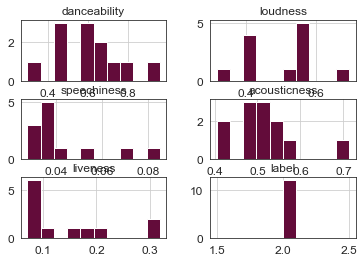

In [29]:
songs[songs['label']==2].hist()

In [30]:
songs[songs['label']==3].mean()

danceability    0.753913
loudness        0.675793
speechiness     0.086665
acousticness    0.085601
liveness        0.174887
label           3.000000
dtype: float64

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
#Predicting the Test set results
y_pred = rfc.predict(X_test)
    

In [39]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[2 0 0 0]
 [0 3 0 0]
 [1 1 2 0]
 [0 0 0 7]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

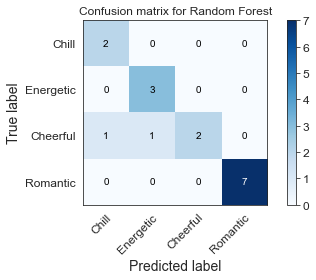

In [40]:
# Confusion matrix
definitions = ['Chill','Energetic','Cheerful','Romantic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [41]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.08567863456516182),
 ('loudness', 0.22163600681439408),
 ('speechiness', 0.20488448363778697),
 ('acousticness', 0.3838098626490135),
 ('liveness', 0.10399101233364375)]

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [43]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[1 0 0 1]
 [0 2 1 0]
 [0 0 4 0]
 [0 0 0 7]]


<AxesSubplot:title={'center':'Confusion matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

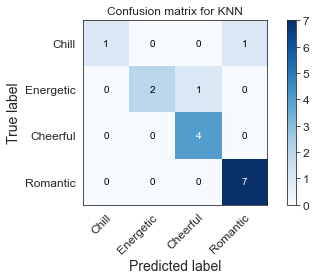

In [44]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [45]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[0 0 0 2]
 [0 0 3 0]
 [0 0 4 0]
 [0 0 0 7]]


<AxesSubplot:title={'center':'Confusion matrix for SVM'}, xlabel='Predicted label', ylabel='True label'>

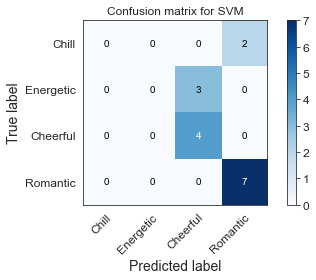

In [46]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [47]:
from sklearn.neural_network import MLPClassifier

In [48]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\Sanjana\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [49]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[0 0 0 2]
 [0 2 1 0]
 [0 0 3 1]
 [0 0 0 7]]


<AxesSubplot:title={'center':'Confusion matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

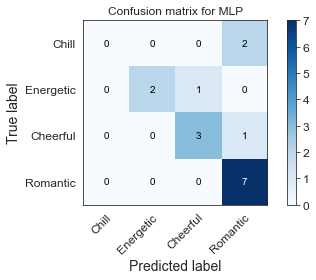

In [50]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [52]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Chill       0.00      0.00      0.00         2
   Energetic       1.00      0.67      0.80         3
    Cheerful       0.75      0.75      0.75         4
    Romantic       0.70      1.00      0.82         7

    accuracy                           0.75        16
   macro avg       0.61      0.60      0.59        16
weighted avg       0.68      0.75      0.70        16
MLP


In [53]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Chill       0.00      0.00      0.00         2
   Energetic       0.00      0.00      0.00         3
    Cheerful       0.57      1.00      0.73         4
    Romantic       0.78      1.00      0.88         7

    accuracy                           0.69        16
   macro avg       0.34      0.50      0.40        16
weighted avg       0.48      0.69      0.56        16
SVM


In [54]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Chill       1.00      0.50      0.67         2
   Energetic       1.00      0.67      0.80         3
    Cheerful       0.80      1.00      0.89         4
    Romantic       0.88      1.00      0.93         7

    accuracy                           0.88        16
   macro avg       0.92      0.79      0.82        16
weighted avg       0.90      0.88      0.86        16
KNN


In [55]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Chill       0.67      1.00      0.80         2
   Energetic       0.75      1.00      0.86         3
    Cheerful       1.00      0.50      0.67         4
    Romantic       1.00      1.00      1.00         7

    accuracy                           0.88        16
   macro avg       0.85      0.88      0.83        16
weighted avg       0.91      0.88      0.86        16
forest


# Genres classified 

## Now to work on mapping mood with songs

In [68]:
songs.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
0,Dynamite,BTS,0t1kP63rueHleOhQkYSXFY,0.746,0.746370,0.0993,0.01120,0.0936,3
1,Savage Love (Laxed - Siren Beat),Jawsh 685,1xQ6trAsedVPCdbtDAmk0c,0.767,0.414811,0.0803,0.23400,0.2690,0
2,Savage Love (Laxed – Siren Beat) [BTS Remix],Jawsh 685,4TgxFMOn5yoESW6zCidCXL,0.758,0.642707,0.0868,0.16000,0.2950,2
3,Ice Cream (with Selena Gomez),BLACKPINK,60jpDubMmVyR5molJp2TCm,0.791,0.791384,0.3500,0.03050,0.0423,1
4,Se Te Nota (with Guaynaa),Lele Pons,11EnQRgRMJwMAesfkB5pnu,0.905,0.847854,0.0664,0.09070,0.2660,3
5,Mere Dholna,Pritam,2R4zzmPXIFuBH0BqdWDkfC,0.680,0.869716,0.1220,0.41400,0.2160,3
6,Soja Zara,Madhushree,6H5HH4T4K1cyHdUGEJ1pzV,0.766,0.370039,0.0518,0.72400,0.1190,3
7,Aaj Jane Ki Zid Na Karo,Farida Khanum,6XFGKGOjlwXWm12DHV1CWc,0.297,0.545983,0.0354,0.53500,0.3100,3
8,Dhadak Title Track,Ajay Gogavale,6Gx3Ry4ORogdMibbdITOuN,0.375,0.242498,0.0310,0.85000,0.1370,2
9,"Raabta (Title Track) [From ""Raabta""]",Pritam,4e9dIemIXO8Tzg0k4aWujk,0.636,0.551549,0.0363,0.41400,0.1060,1


In [91]:
chillsongs = songs[songs['label']==0]
chillsongs =chillsongs.sort_values(by='danceability')
chillsongs

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
11,Kaisi Paheli Zindagani,Sunidhi Chauhan,2lCjVXsbBB1rOJ5BGbprZ2,0.729,0.000000,0.0629,0.529,0.0718,0
40,"Chashni (From ""Bharat"")",Abhijeet Srivastava,5X5db3FrBOHbibrFKA02MQ,0.756,0.404969,0.0341,0.495,0.0901,0
28,Suit Suit,Guru Randhawa,5Nd4DTIDWYkkZfi1NpgvJk,0.767,0.829380,0.0908,0.140,0.2210,0
1,Savage Love (Laxed - Siren Beat),Jawsh 685,1xQ6trAsedVPCdbtDAmk0c,0.767,0.414811,0.0803,0.234,0.2690,0
37,Proper Patola,Badshah,39ujbBjTwwqUFySaCYDMMT,0.770,0.578493,0.0851,0.485,0.3180,0


In [83]:
Energeticsongs = songs[songs['label']==1]
Energeticsongs =Energeticsongs.sort_values(by='danceability',ascending=False)
Energeticsongs

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
3,Ice Cream (with Selena Gomez),BLACKPINK,60jpDubMmVyR5molJp2TCm,0.791,0.791384,0.3500,0.0305,0.0423,1
38,"Hauli Hauli (From ""De De Pyaar De"")",Garry Sandhu,60XrRbNjDMAGUZ2xLkU9W3,0.705,0.829784,0.0788,0.0212,0.3370,1
31,Cheez Badi,Udit Narayan,1Z9xHpcE6BcPtyPBajJAbp,0.704,0.750968,0.0435,0.1530,0.1470,1
46,Dil Cheez Tujhe Dedi,Ankit Tiwari,4KfIDhVW9WUwUEouFcf6YN,0.699,0.543804,0.0483,0.0207,0.3760,1
34,High Rated Gabru,Guru Randhawa,4dJWik0ax9bRFXl0HqbFjT,0.685,0.865602,0.0942,0.1180,0.2600,1
9,"Raabta (Title Track) [From ""Raabta""]",Pritam,4e9dIemIXO8Tzg0k4aWujk,0.636,0.551549,0.0363,0.4140,0.1060,1
27,Kalank (Title Track),Arijit Singh,1Y8jKq7CYLEW6PWp11jWZC,0.570,0.429090,0.0350,0.5240,0.0921,1
20,"Aaj Ibaadat (From ""Bajirao Mastani"")",Javed Bashir,6gEV0FyOnybSM82m16Y1Oi,0.492,0.696192,0.0302,0.5620,0.0954,1


In [85]:
cheerfulsongs = songs[songs['label']==2]
cheerfulsongs =cheerfulsongs.sort_values(by='acousticness',ascending=False)
cheerfulsongs

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
19,Katyar Kaljat Ghusli - Theme Song,Shankar-Ehsaan-Loy,57GrqrtHF1Y1VywAZbiELC,0.789,0.146983,0.0309,0.9650,0.0608,2
8,Dhadak Title Track,Ajay Gogavale,6Gx3Ry4ORogdMibbdITOuN,0.375,0.242498,0.0310,0.8500,0.1370,2
14,Moh Moh Ke Dhaage (Male),Anu Malik,189DQylImZ1hGZaIpAQUzx,0.634,0.213859,0.0288,0.7410,0.1110,2
10,Ae Dil Hai Mushkil Title Track,Pritam,1UWacd8x8tPPwmrPB1MoBI,0.495,0.566554,0.0679,0.7130,0.1650,2
17,Sur Niragas Ho,Shankar Mahadevan,13ZSQwrx2EDXlAJYwEjak7,0.447,0.314295,0.0329,0.7120,0.3860,2
13,Kalank (Title Track),Arijit Singh,6vo7Y1iWyZvpjvFbf6BiZ5,0.570,0.429090,0.0350,0.5240,0.0921,2
41,First Class,Arijit Singh,7bFx4We3iNjxmIxXBxou1G,0.534,0.806066,0.3610,0.4490,0.3540,2
22,Look What You Made Me Do,Taylor Swift,1P17dC1amhFzptugyAO7Il,0.766,0.580106,0.1230,0.2040,0.1260,2
2,Savage Love (Laxed – Siren Beat) [BTS Remix],Jawsh 685,4TgxFMOn5yoESW6zCidCXL,0.758,0.642707,0.0868,0.1600,0.2950,2
39,"Coca Cola (From ""Luka Chuppi"")",Tony Kakkar,352wEkChkiClswqwDoM0nj,0.722,0.807519,0.0904,0.1210,0.1230,2


In [92]:
romanticsongs = songs[songs['label']==3]
romanticsongs =romanticsongs.sort_values(by='danceability',ascending=True)
romanticsongs

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
7,Aaj Jane Ki Zid Na Karo,Farida Khanum,6XFGKGOjlwXWm12DHV1CWc,0.297,0.545983,0.0354,0.53500,0.3100,3
18,Man Mandira,Shankar Mahadevan,2WQwk9YwLmwyOgDHa2WiVk,0.478,0.315424,0.0413,0.47100,0.0718,3
16,Moh Moh Ke Dhaage (MTV Unplugged),Anu Malik,1K4eZtD1cz605Ir5fPovMM,0.560,0.004679,0.0328,0.50000,0.1170,3
12,Agar Tum Saath Ho,Alka Yagnik,3hkC9EHFZNQPXrtl8WPHnX,0.562,0.396741,0.0326,0.55700,0.1720,3
15,Moh Moh Ke Dhaage (Female),Anu Malik,7uubRr0u9Zxc1Y84hEn7Xf,0.585,0.446031,0.0286,0.84900,0.1230,3
23,I Knew You Were Trouble.,Taylor Swift,0ciHz919LVKoH4zgxyMPZ9,0.622,0.553727,0.0363,0.00454,0.0398,3
26,Ve Maahi,Arijit Singh,4t1DkxexoMbIHfSHS4Uiyr,0.650,0.545015,0.0274,0.40500,0.2190,3
5,Mere Dholna,Pritam,2R4zzmPXIFuBH0BqdWDkfC,0.680,0.869716,0.1220,0.41400,0.2160,3
29,The Jawaani Song,Vishal-Shekhar,3IzQc4KEAFd8lIc90X7FZr,0.710,0.711278,0.0896,0.07280,0.0744,3
44,Mundiyan,Navraj Hans,1gzbyTeCNZkgicRGX9TXl6,0.714,0.659890,0.0944,0.02610,0.0580,3


## Moods classified and stored

# Mapping

# Chill : Anger
# Energetic : Happy, Surprise
# Cheerful : Fear, Sad
# Romantic : Neutral, Disgust